# Interpolation techniques 

* Nearest Neighbor - Uses the nearest single data point
* Linear interpolation - Uses the two closest data points and draws a line between them <br>
* Cubic spline - Uses more nearby data points and fits a piecewise cubic polynomial <br>

#### Linear interpolation

$\frac{\Delta z}{\Delta x}$ is same between all points

Find the data point $(x,z)$ that falls between $(x_1,z_1)$ and $(x_2,z_2)$. The value $z$ is unknown, but $x$ is known and falls between $x_1$ and $x_2$.<br>

$\frac{z - z_1}{x - x_1} = \frac{z_2 - z_1}{x_2 - x_1 }$

$z_i = \frac{z_2 - z_1}{x_2 - x_1 }\left(x - x_1\right) + z_1$

#### Interpolation in Python

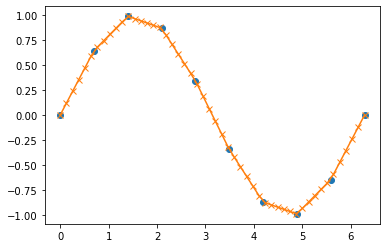

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# From np.interp doc-String
x = np.linspace(0,2*np.pi, 10)
y = np.sin(x)
xvals = np.linspace(0, 2*np.pi, 50)
yinterp = np.interp(xvals, x, y)

fig, ax = plt.subplots()
ax.plot(x,y,'o')
ax.plot(xvals,yinterp,'-x')

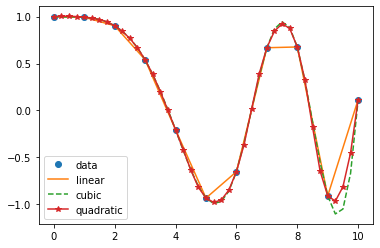

In [2]:
from scipy.interpolate import interp1d
    
x = np.linspace(0,10,num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x,y)
f2 = interp1d(x,y, kind='cubic')
f3 = interp1d(x,y, kind='quadratic')


xnew = np.linspace(0,10, num =41, endpoint=True)
fig, ax = plt.subplots()
ax.plot(x,y,'o',xnew, f(xnew), '-', xnew, f2(xnew), '--',xnew,f3(xnew),'*-')
plt.legend(['data','linear','cubic','quadratic'],loc='best',numpoints = 1)

#### Splines

Originally, mechanical splines where used in boat building to draw a curved line through a set of points

Linear interpolation to design a hull would result in a an ugly inefficient boat design

[Interactive spline example](http://blog.ivank.net/interpolation-with-cubic-splines.html)

Splines use data from not only the two nearest points, but also the the two points around the inner two.

- "piecewise" fit
   -different polynomial for each interval between points
- line : $ z = ax+b$ (two unkowns)
- cubic : $z = ax^3 + bx^2 +cx +d$  (four unknowns)


##### Pros
* smooth, not jagged: calculate derivatives at data points  
* Piecewise fit, i.e. the solution at  one locations don't affect the solution far away 
* Way better than fitting a  polynomial to the entire function (ie if you have 8 data point and fit a 9th order polynomial)

##### Cons
* Closely spaced data points lead to "overshooting"
* "Smoothing splines" help, but  doesn't represent data exactly